# Per-Decision Importance Sampling Analysis
[Add intro]
We will test the PDIS method on the different environments.

## Inverted-pendulum

In [47]:
import pandas as pd
import numpy as np
import glob, sys
import matplotlib.pyplot as plt
import scipy.stats as sts

# Helpers
def merge_cols(logs, col):
    m = np.array([l[col] for l in logs])
    return m

def get_stats(logs, col, conf=0.95):
    m = merge_cols(logs, col)
    mean = np.mean(m, axis=0)
    std = np.std(m, axis=0)
    interval = sts.t.interval(conf, len(logs)-1, loc=mean, scale=std/np.sqrt(len(logs)))
    return {
        'mean' : mean,
        'std': std,
        'ci' : interval
    }

def visualize(logs):
    cols = ['EpLenMean', 'EpRewMean', 'Bound', 'J_sample_variance']
    fig, ax = plt.subplots(len(cols)//2,2, sharex=True, figsize=(16, len(cols)*2))
    for i, c in enumerate(cols):
        stats = get_stats(logs, c)
        ax[i//2,i%2].plot(stats['mean'])
        ax[i//2,i%2].fill_between(range(len(stats['mean'])),stats['ci'][0], stats['ci'][1], alpha=0.3)
        ax[i//2,i%2].set_title(c)
    plt.show()
    fig, ax = plt.subplots(1, figsize=(16,4))
    for i in range(len(logs)):
        ax.plot(logs[i]['EpRewMean'])
    plt.show()
    fig, ax = plt.subplots(1, figsize=(16,4))
    for i in range(len(logs)):
        ax.plot(logs[i]['EpLenMean'])
    plt.show()

### IS baseline

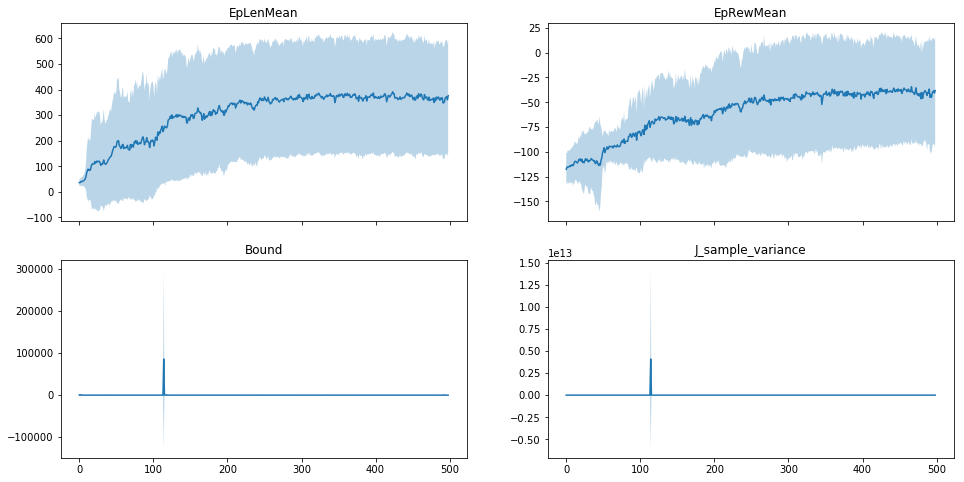

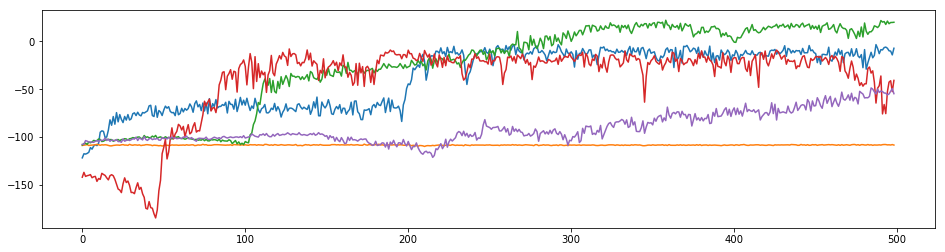

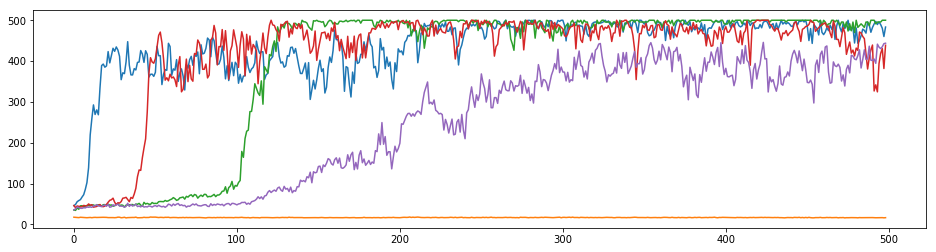

In [49]:
files=glob.glob('../results/nico/INVERTED-PENDULUM_iw=is_bound=max-d2_delta=0.9_gamma=0.99_center=True_seed=*')
logs=[pd.read_csv(f) for f in files]
visualize(logs)

## PDIS 

- Normalized returns
- Bound: pdis-d2 
- Delta=0.9 
- Gamma 0.9

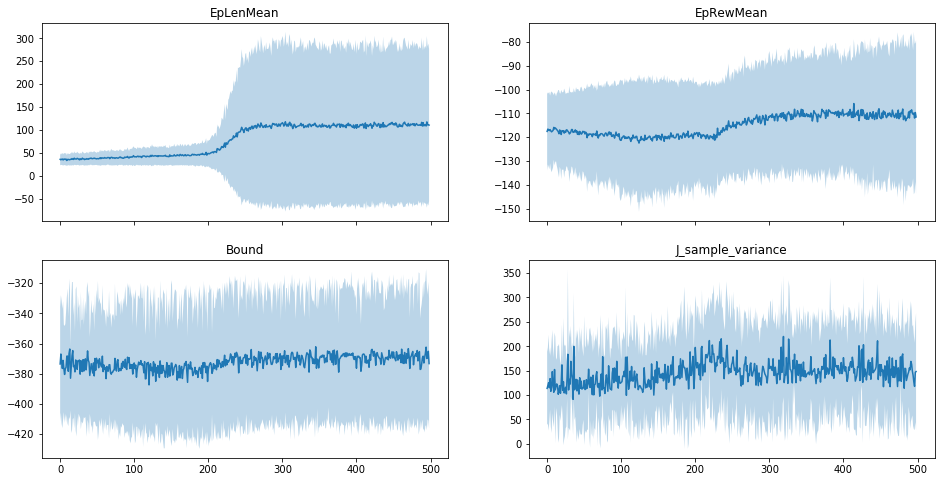

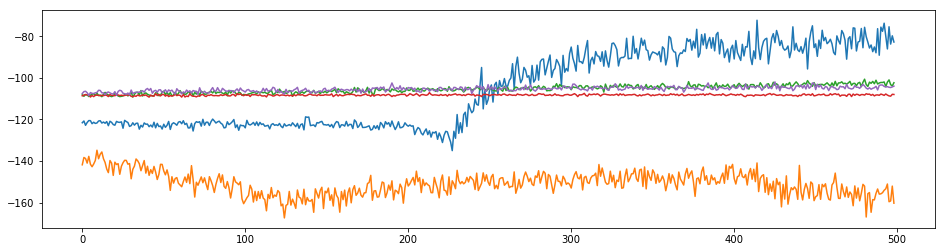

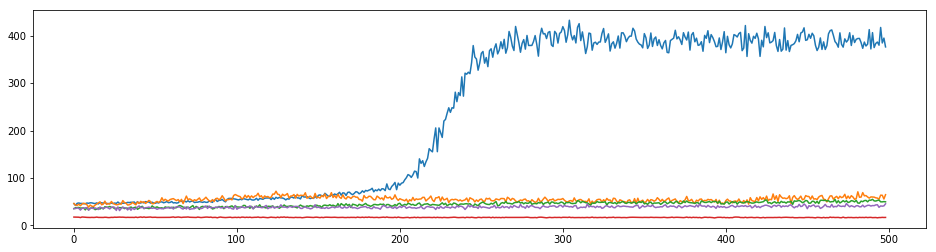

In [50]:
files=glob.glob('../results/nico/INVERTED-PENDULUM_iw=pdis_bound=pdis-d2_delta=0.9_gamma=0.99_center=False_seed=*')
logs=[pd.read_csv(f) for f in files]
visualize(logs)

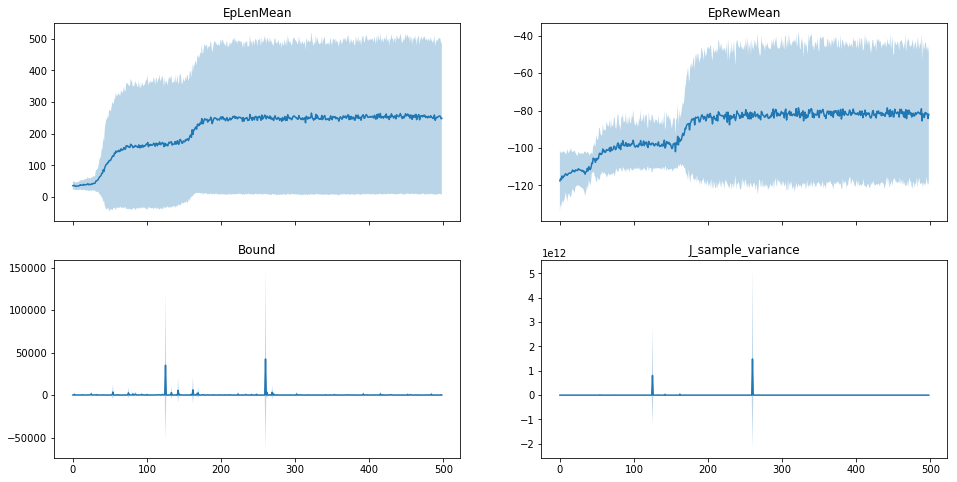

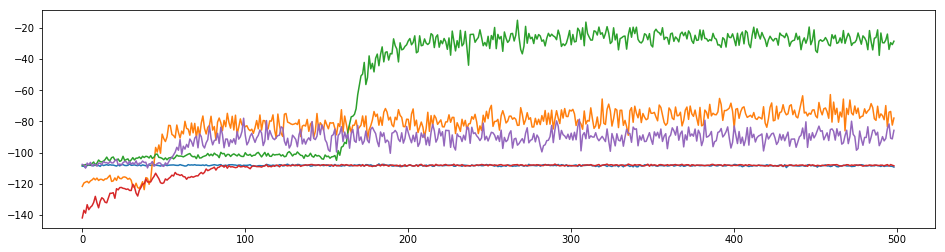

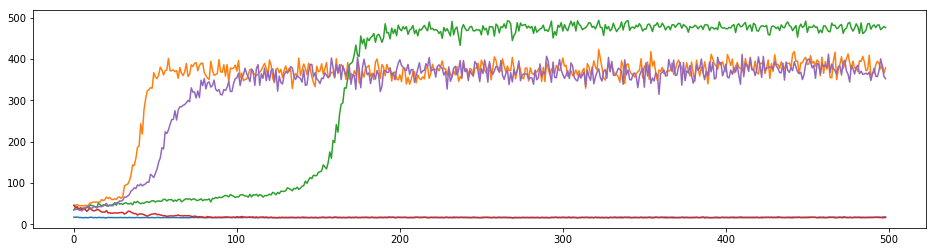

In [51]:
files=glob.glob('../results/nico/INVERTED-PENDULUM_iw=pdis_bound=pdis-d2_delta=0.99_gamma=0.99_center=True_seed=*')
logs=[pd.read_csv(f) for f in files]
visualize(logs)